<a href="https://colab.research.google.com/github/zubair1502/Personal-Projects/blob/main/Bike_sharing_example_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This work has been done on Kaggle bike sharing dataset.

The main work has been done by: [Patrick Gerbert](https://github.com/pgebert)

I use the idea for my practice with a some changes 





importing libraries 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import numpy as np
import pandas as pd
# Sklearn model delection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import random

%matplotlib inline

class to download and split data into train, test and validation set

In [2]:

class Dataloader(): 

    def __init__(self, csv_path):

        self.csv_path = csv_path
        self.data = pd.read_csv(self.csv_path)

    def getHeader(self):

        return list(self.data.columns.values)

    def getFullData(self):     

        return self.data

    def split_data(self):
      df = self.data
      train, val, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

      return train, val, test



In [3]:
dataloader = Dataloader('https://github.com/firmai/python-business-analytics/raw/master/data/bike/hour.csv')
train, val, test = dataloader.split_data()
print('train: {}' .format(len(train)), 'val: {}' .format(len(val)), 'test: {}' .format(len(test)))
fullData = dataloader.getFullData()

category_features = ['season', 'holiday', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit']
number_features = ['temp', 'atemp', 'hum', 'windspeed']

features= category_features + number_features
target = ['cnt']

train: 10427 val: 3476 test: 3476


In [4]:
print(list(fullData.columns))

['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [5]:
print(fullData.head())

   instant      dteday  season  yr  ...  windspeed  casual  registered  cnt
0        1  2011-01-01       1   0  ...        0.0       3          13   16
1        2  2011-01-01       1   0  ...        0.0       8          32   40
2        3  2011-01-01       1   0  ...        0.0       5          27   32
3        4  2011-01-01       1   0  ...        0.0       3          10   13
4        5  2011-01-01       1   0  ...        0.0       0           1    1

[5 rows x 17 columns]


In [6]:
print(fullData[number_features].describe())

               temp         atemp           hum     windspeed
count  17379.000000  17379.000000  17379.000000  17379.000000
mean       0.496987      0.475775      0.627229      0.190098
std        0.192556      0.171850      0.192930      0.122340
min        0.020000      0.000000      0.000000      0.000000
25%        0.340000      0.333300      0.480000      0.104500
50%        0.500000      0.484800      0.630000      0.194000
75%        0.660000      0.621200      0.780000      0.253700
max        1.000000      1.000000      1.000000      0.850700


In [7]:
fullData.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
for col in category_features:
    fullData[col] = fullData[col].astype('category')
print(fullData[category_features].describe())

        season  holiday   mnth     hr  weekday  workingday  weathersit
count    17379    17379  17379  17379    17379       17379       17379
unique       4        2     12     24        7           2           4
top          3        0      7     17        6           1           1
freq      4496    16879   1488    730     2512       11865       11413


In [9]:
print(fullData.isnull().any())

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


In dataset, 


*   Seasons are represented as  (1: springer, 2: summer, 3: fall, 4: winter)
*   yr : year (0: 2011, 1:2012)
*   mnth : month ( 1 to 12)
*   hr : hour (0 to 23)
*   holiday : weather day is holiday or not
*   weekday : day of the week
*   workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
*   weathersit :
1.   Clear, Few clouds, Partly cloudy, Partly cloudy
2.   Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
1.   Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
2.   Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

*   temp: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
*   atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)

*   hum: Normalized humidity. The values are divided to 100 (max)
*   windspeed: Normalized wind speed. The values are divided to 67 (max)
*   casual: count of casual users
*   registered: count of registered users
*   cnt: count of total rental bikes including both casual and registered


























[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Temperature'),
 Text(0.5, 1.0, 'Box Plot On Count Across Temperature')]

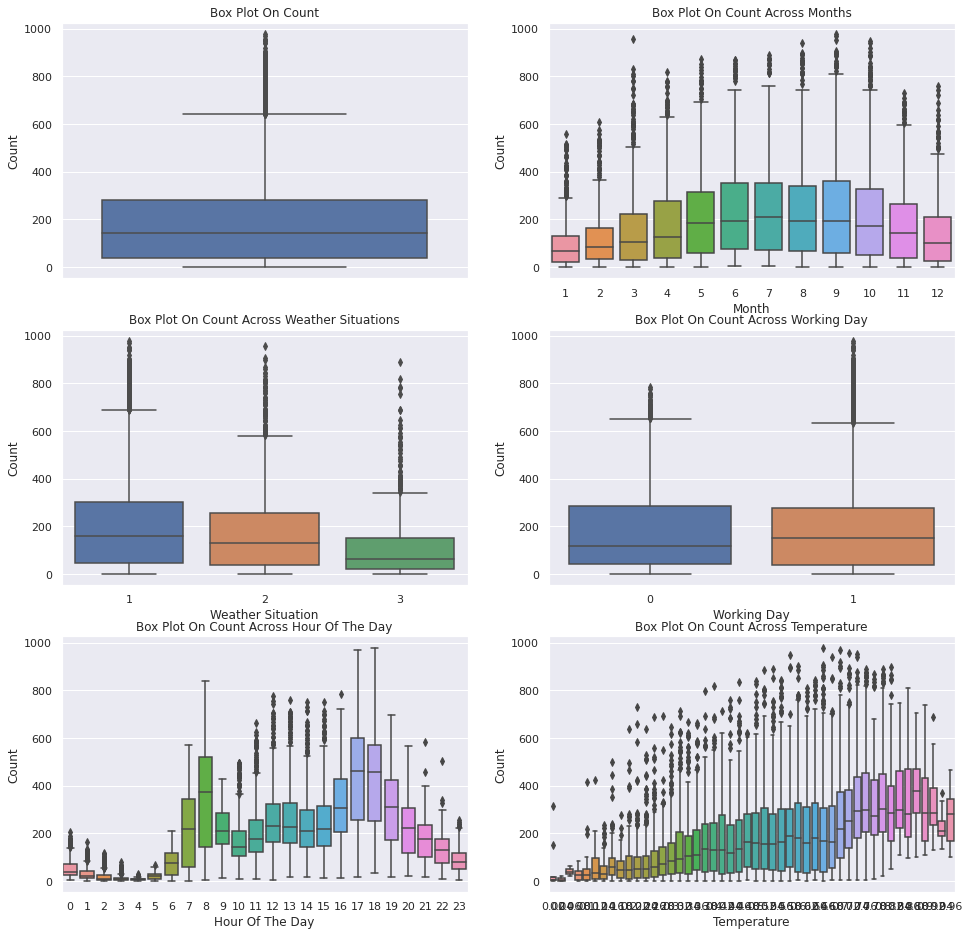

In [10]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(16, 16)
sns.boxplot(data=train,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=train,y="cnt",x="mnth",orient="v",ax=axes[0][1])
sns.boxplot(data=train,y="cnt",x="weathersit",orient="v",ax=axes[1][0])
sns.boxplot(data=train,y="cnt",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=train,y="cnt",x="hr",orient="v",ax=axes[2][0])
sns.boxplot(data=train,y="cnt",x="temp",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[2][1].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")


*   Visual analysis shows that people rent bikes during weekdays more as compare to weekend and hoildays. 
*   Peeks hours are from 8 am to 5 pm 
*   People rent bikes more in higher temperature and less in low temperature





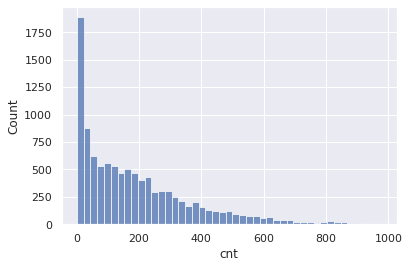

In [51]:
sns.histplot(train[target[-1]])


above histogram shows that and box plot shows that there are outliers in the data that will impact on model learning so it needs to be remove. 

Here the method use to remove outliers in Quartile 

training set with outliers: 10427
training set without outliers: 10134


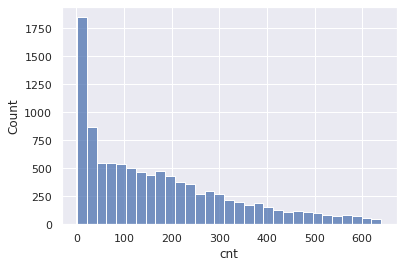

In [52]:
print("training set with outliers: {}".format(len(train)))
q1 = train.cnt.quantile(0.25)
q3 = train.cnt.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
train_preprocessed = train.loc[(train.cnt >= lower_bound) & (train.cnt <= upper_bound)]
print("training set without outliers: {}".format(len(train_preprocessed)))
sns.histplot(train_preprocessed.cnt)

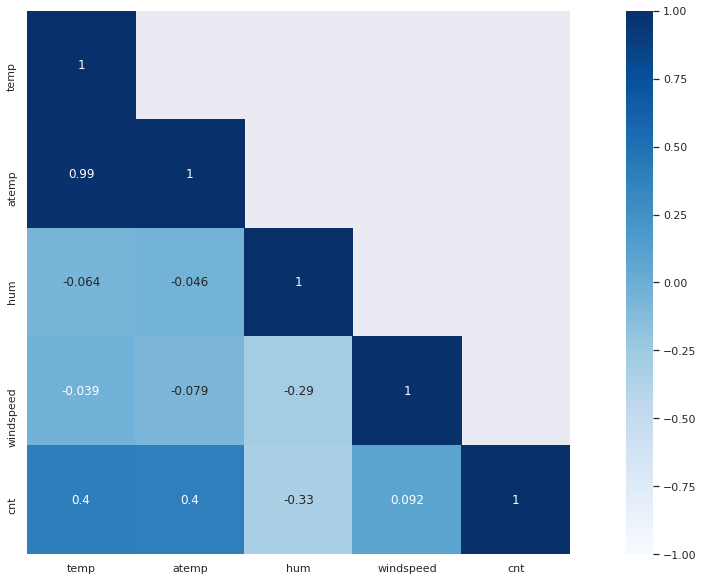

In [13]:
matrix = train[number_features + target].corr()
heat = np.array(matrix)
heat[np.tril_indices_from(heat)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.set(font_scale=1.0)
sns.heatmap(matrix, mask=heat,vmax=1.0, vmin=-1.0, square=True,annot=True, cmap="Blues")

In [14]:
features.remove('atemp')

In [15]:
x_train = train_preprocessed[features].values
y_train = train_preprocessed[target].values.ravel()
val = val.sort_values(by=target)
x_val = val[features].values
y_val = val[target].values.ravel()
x_test = test[features].values

In [16]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_predict = regressor.predict(x_val)

In [41]:
 mse_1 = mean_squared_error(y_val, y_predict)
score_1 = regressor.score(x_val, y_val)   

In [43]:
print(score_1)

0.32723708826929887


In [44]:
print(mse_1)

22255.49618410548


In [45]:
model = RandomForestRegressor(bootstrap= True, criterion= 'mse', n_estimators= 200)
model.fit(x_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
y_pred = model.predict(x_val)

In [47]:
score_2 = model.score(x_val, y_val)
print(score_2)

0.8287195477943774


In [49]:
mse_2 = mean_squared_error(y_val, y_pred)
print(mse_2)

5666.08441697209


In [50]:
Table = PrettyTable()
Table.field_names = ['model' , 'MSE', 'R-Squared Value']

Table.add_row(['Linear Regression' , format(mse, '.2f'), format(score , '.2f')])
Table.add_row(['RandomForestRegressor' , format(mean_squared_error(y_val, y_pred), '.2f'), format(sc , '.2f')])

print(Table)

+-----------------------+----------+-----------------+
|         model         |   MSE    | R-Squared Value |
+-----------------------+----------+-----------------+
|   Linear Regression   | 22255.50 |       0.33      |
| RandomForestRegressor | 5666.08  |       0.83      |
+-----------------------+----------+-----------------+
